<a href="https://colab.research.google.com/github/NirmalVignu/Machine-Learning-Projects/blob/master/IMAGE_COMPRESSION_KMEANS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries- 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import cv2

# Reading and plotting with the help of matplotlib library-

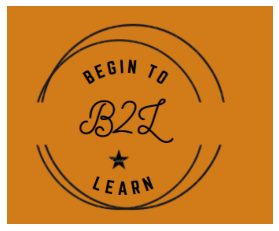

In [66]:
img=plt.imread('b2l.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**Checking data type of an image in system- its always numpy array.**

In [67]:
type(img)

numpy.ndarray

 **Analyzing the properties of image-**

In [68]:
print(img.shape)

(277, 338, 4)


In [69]:
print(img.size)

374504


# Reshape image and Normalize image pixel values-


In [70]:
#3d to 2D image by combining w and h
w,h,d=img.shape
image_array=img.reshape(w*h,d)
print(image_array.shape)
#normalize in the range of (0,1)
img=img/255

(93626, 4)


# Extracting small subset of image for training model-

In [71]:
from sklearn.utils import shuffle

# fitting model on a small sub sample of the complete image

image_array_sample = shuffle(image_array,random_state=1)[:1000]

image_array_sample.size

4000

# KMeans Model Creation and training-

In [72]:
kmeans=KMeans(n_clusters=6,random_state=1)

kmeans.fit(image_array_sample) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

**Predicting labels for complete image-**

In [73]:
labels=kmeans.predict(image_array)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

**Printing Centroids-** 

In [74]:
c=kmeans.cluster_centers_
print(c)

[[0.8192462  0.48606607 0.09797117 1.        ]
 [0.14411771 0.1264706  0.09681372 1.        ]
 [0.71207434 0.42105263 0.09597524 1.        ]
 [0.02083331 0.01666659 0.00416666 1.        ]
 [0.5277312  0.32408965 0.09159664 1.        ]
 [0.2874811  0.20271495 0.11674207 1.        ]]


# Recreate Original image according to labels-

In [75]:
#recreate original image according to labels and each pixels

def recreate_image(c,labels,w,h,d):

  image=np.zeros((w,h,d))

  label_idx=0

#now label each pixels according to the limited labels

  for i in range(w):

    for j in range(h):

      image[i][j]=c[labels[label_idx]]

      #print(labels[label_idx])

      label_idx+=1

  return(image)

# Visualizing and comparing the original and compressed images- 

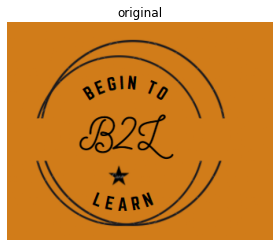

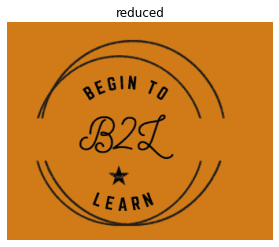

In [79]:
img=img*255
plt.figure(1)

plt.axis('off')

plt.title("original")

plt.imshow(img)

plt.show()

plt.figure(2)

plt.axis('off')

plt.title("reduced")

plt.imshow(recreate_image(c,labels,w,h,d))

plt.show()

In [77]:
recreate_image(c,labels,w,h,d).size

374504